In [3]:
from ndslib.data import load_data
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300




In [4]:


abide_data = load_data("abide2")
abide_data.shape
# abide_data.head()
# %%
features = abide_data.filter(like='fs')
# features.head()
phenotypes = abide_data.iloc[:, :6]  # first 6  columns of all
# samples are put in a dataframe called phenotypes
# phenotypes.head()


In [5]:
X = features
y = pd.to_numeric(phenotypes['group'])
y = y - 1
X.shape

(1004, 1440)

/home/ashish/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ashish/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ashish/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/home/ashish/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


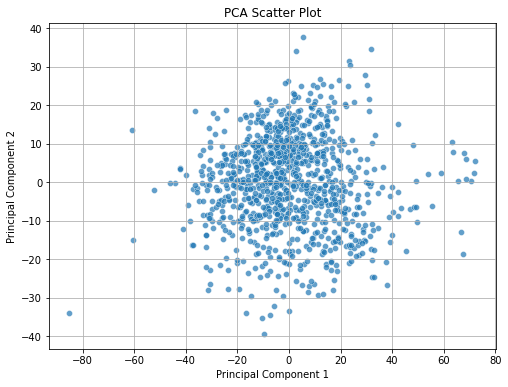

ValueError: All arrays must be of the same length

<Figure size 576x432 with 0 Axes>

In [11]:


# Assuming 'X' is your feature matrix with shape (n_samples, n_features)
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)

# Step 3: Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Select principal components
# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Choose the number of components or the amount of variance to retain
# For example, if you want to retain 90% of the variance
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Select the top 'n_components' eigenvectors
top_eigenvectors = eigenvectors[:, :n_components]

# Step 5: Project data onto principal components
X_pca = np.dot(X_scaled, top_eigenvectors)

# 'X_pca' now contains the data projected onto the selected principal components
# %%


# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

# Explained variance plot
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, n_components + 1), y=explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [10]:

# Explained variance plot
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, n_components + 1), y=explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


ValueError: All arrays must be of the same length

<Figure size 576x432 with 0 Axes>

In [21]:
'''
# Biplot (scatter plot with original features)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
for i in range(len(features)):
    plt.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i,
              1], color='r', alpha=0.5, width=0.01)
    plt.text(eigenvectors[i, 0] * 1.1, eigenvectors[i, 1] *
             1.1, features[i], color='r', ha='center', va='center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of PCA')
plt.grid(True)
plt.show()
'''

"\n# Biplot (scatter plot with original features)\nplt.figure(figsize=(10, 8))\nsns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)\nfor i in range(len(features)):\n    plt.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i,\n              1], color='r', alpha=0.5, width=0.01)\n    plt.text(eigenvectors[i, 0] * 1.1, eigenvectors[i, 1] *\n             1.1, features[i], color='r', ha='center', va='center')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('Biplot of PCA')\nplt.grid(True)\nplt.show()\n"

In [14]:
# Initialize the Random Forest classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




'''
# Assuming 'X_pca' contains the data projected onto the first two principal components
# 'explained_variance_ratio' contains the explained variance ratio for each component

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1 ({}% variance)'.format(round(explained_variance_ratio[0] * 100, 2)))
plt.ylabel('Principal Component 2 ({}% variance)'.format(round(explained_variance_ratio[1] * 100, 2)))
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()
'''

Accuracy: 0.6069651741293532
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.47      0.52        91
         1.0       0.62      0.72      0.67       110

    accuracy                           0.61       201
   macro avg       0.60      0.60      0.59       201
weighted avg       0.60      0.61      0.60       201



"\n# Assuming 'X_pca' contains the data projected onto the first two principal components\n# 'explained_variance_ratio' contains the explained variance ratio for each component\n\n# Scatter plot of the first two principal components\nplt.figure(figsize=(8, 6))\nplt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)\nplt.xlabel('Principal Component 1 ({}% variance)'.format(round(explained_variance_ratio[0] * 100, 2)))\nplt.ylabel('Principal Component 2 ({}% variance)'.format(round(explained_variance_ratio[1] * 100, 2)))\nplt.title('PCA Scatter Plot')\nplt.grid(True)\nplt.show()\n"

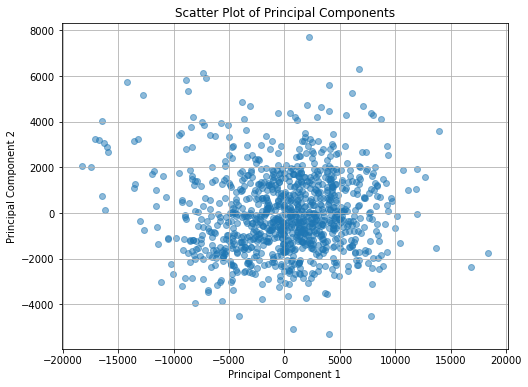

In [16]:
from sklearn.decomposition import PCA

# Assuming 'X' is your feature matrix
# Initialize PCA
pca = PCA(n_components=10)  # Specify the number of principal components you want to compute

# Fit PCA and transform the data
X_pca = pca.fit_transform(X)

# 'X_pca' now contains the transformed data with the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.grid(True)
plt.show()

In [30]:

# Assuming 'X' is your feature matrix
# Initialize PCA
pca = PCA(n_components=500)

# Fit PCA to the data
pca.fit(X)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for the first 10 components
print("Explained Variance Ratio for the first 10 components:")
print(explained_variance_ratio[:10])
component_indices = range(1, len(explained_variance_ratio) + 1)

# Print the component indices
print("Component Indices:")
print(component_indices)

Explained Variance Ratio for the first 10 components:
[0.36757041 0.04516606 0.03521453 0.02201474 0.02037504 0.0150388
 0.01482572 0.01392734 0.01292973 0.01192703]
Component Indices:
range(1, 501)
